<a href="https://colab.research.google.com/github/HP-9820/Image-Processing-OpenCV-/blob/main/Opencv_Filters_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

##OpenCV filters-
operations applied to images to enhance, transform, or analyze visual data. These filters are commonly used for tasks like edge detection, noise reduction, sharpening, and blurring.

To enhance the image by increasing the intensity by using filter (Kernel in OpenCV)

FIlter is applied on individual channels, because filter is 2D, and Image is 3D (R, G, B) - applies the indivial and it becomes R1, G1,B1 by applying filter

In [ ]:
rgb_image = cv2.imread('/content/beach-blue.jpg')

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])


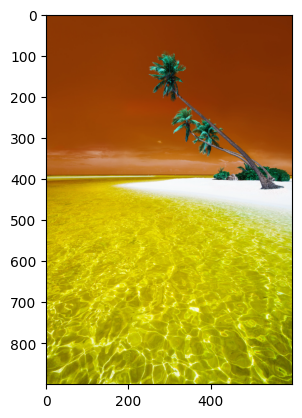

In [ ]:
plt.imshow(rgb_image)

In [ ]:
def apply_filter(image, kernel):
  b, g, r = cv2.split(image)
  b_new= cv2.filter2D(b, -1, kernel)
  g_new= cv2.filter2D(g, -1, kernel)
  r_new= cv2.filter2D(r, -1, kernel)
  image_filtered= cv2.merge((b_new, g_new, r_new))
  return image_filtered

In [ ]:
filtered_image = apply_filter(rgb_image, kernel)

Text(0.5, 1.0, 'filtered_image')

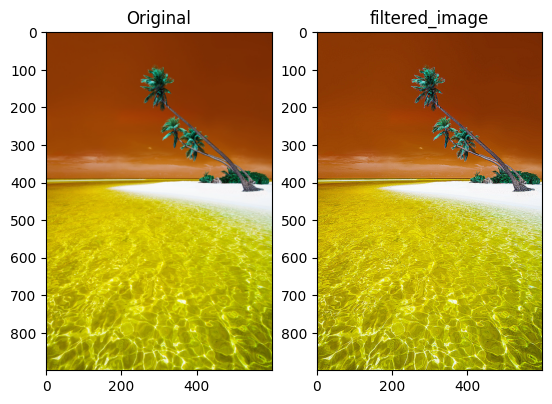

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('filtered_image')

In [ ]:
def apply_filter(image, kernel, arrange='rgb'):
  b, g, r = cv2.split(image)
  b_new = cv2.filter2D(b, -1, kernel)
  g_new = cv2.filter2D(g, -1, kernel)
  r_new = cv2.filter2D(r, -1, kernel)
  if arrange == 'rgb':
    image_filtered = cv2.merge((b_new, g_new, r_new))
  elif arrange == 'bgr':
    image_filtered = cv2.merge((r_new, g_new, b_new))
  return image_filtered

In [ ]:
filtered_imagergb_ = apply_filter(rgb_image, kernel, arrange='rgb')
filtered_imagebgr_ = apply_filter(rgb_image, kernel, arrange='bgr')

Text(0.5, 1.0, 'filtered_imagebgr_')

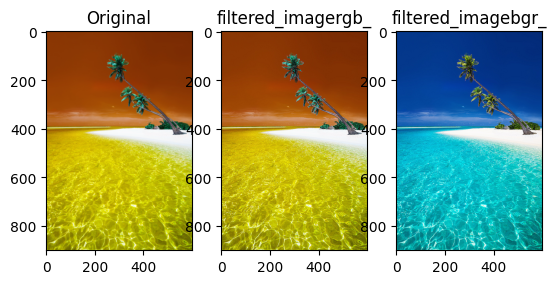

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(filtered_imagergb_)
plt.title('filtered_imagergb_')

plt.subplot(1, 3, 3)
plt.imshow(filtered_imagebgr_)
plt.title('filtered_imagebgr_')

## Blurring

Bluring is useful to reduce the noise

  -  Gaussian blur is a technique to reduce noise and detail by averaging pixel values in a neighborhood, weighted by a Gaussian kernel (a bell-shaped curve)

  How It Works


A Gaussian kernel (a small matrix with weights based on the Gaussian function) is created.


This kernel is slid over the image.


Each pixel is replaced with the weighted sum of its neighbors, determined by the kernel.

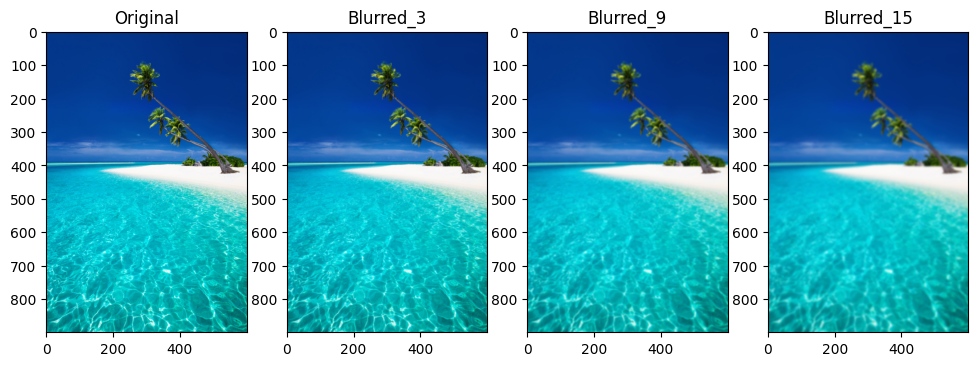

In [ ]:
# Load the image
image = cv2.imread('/content/beach-blue.jpg')

# Check if image loaded successfully
if image is None:
  print("Error: Could not load image. Please check the file path.")
else:
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  kernelSizes = [(3, 3), (9, 9), (15, 15)]

# Blurring the Image
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)

plt.figure(figsize=(15, 8))

plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')

plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')

plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')
plt.show()

## Sharpening
Sharpening an image enhances its edges and fine details, making it appear more defined. This is typically achieved by applying a high-pass filter or combining a smoothed (blurred) version of the image with the original image using convolutional kernels.



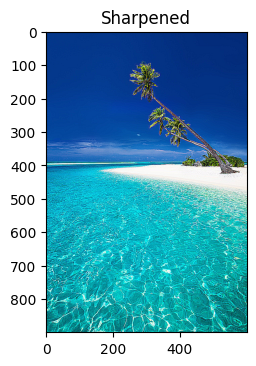

In [ ]:
# Sharpening the Image
# kernel_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)
# sharpened = cv2.filter2D(sharpened, -1, kernel_2)

plt.figure(figsize=(15, 8))
plt.subplot(1, 5, 1)
plt.imshow(sharpened)
plt.title('Sharpened')

plt.show()

# Enhancing Images: Contrast Adjustment, Sharpening (CLAHE)

CLAHE (Contrast Limited Adaptive Histogram Equalization) is an image enhancement technique used to improve the contrast of an image. Unlike standard histogram equalization, which operates on the entire image globally, CLAHE enhances contrast in smaller regions or tiles of the image, making it more effective for uneven lighting conditions.


Clahe divides the image into multiple parts/grids- each grid it calculates the histogram and sets the clip limit

-Higher clip limit- Contrast Enhancement

Use Cases:

Enhancing details in low-contrast images.

Medical imaging (e.g., X-rays).

Improving images captured in challenging lighting conditions.

Applications in object detection and computer vision.


Text(0.5, 1.0, 'Enhanced Contrast')

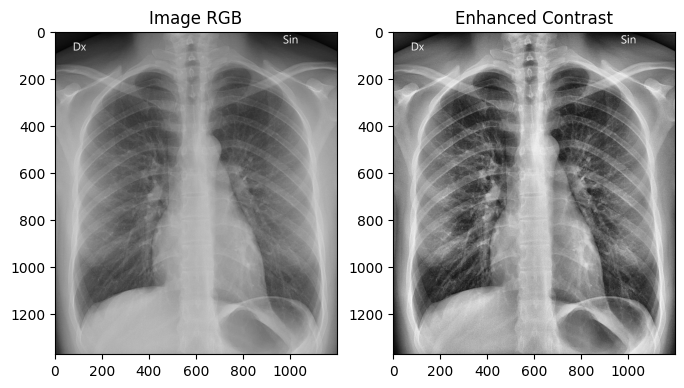

In [ ]:
# CLAHE for greyscale

image = cv2.imread('/content/xray.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cl1 = clahe.apply(gray)

# Save the CLAHE-enhanced grayscale image
cv2.imwrite('./temp/clahe_contrast_enhanced.jpg', cl1)  # Save as a JPG file

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')
plt.title('Enhanced Contrast')

# LAB - used on RGB image


A LAB image represents an image in the CIE LAB color space, a perceptually uniform color space designed to mimic human vision. Unlike RGB or BGR, LAB separates color information into lightness and chromatic components, which makes it particularly useful in image processing tasks like color correction and contrast adjustments.

Components of LAB Color Space

The LAB color space has three channels:

L (Lightness):

 - Represents the brightness of the image.

 - Values range from 0 (black) to 100 (white).

 - Contains no color information.

A (Green-Red Chromatic Component):

- Specifies the color along the green-red axis.

- Negative values indicate green, and positive values indicate red.

- Values typically range from -128 to 127.

B (Blue-Yellow Chromatic Component):

- Specifies the color along the blue-yellow axis.

- Negative values indicate blue, and positive values indicate yellow.

- Values typically range from -128 to 127.

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

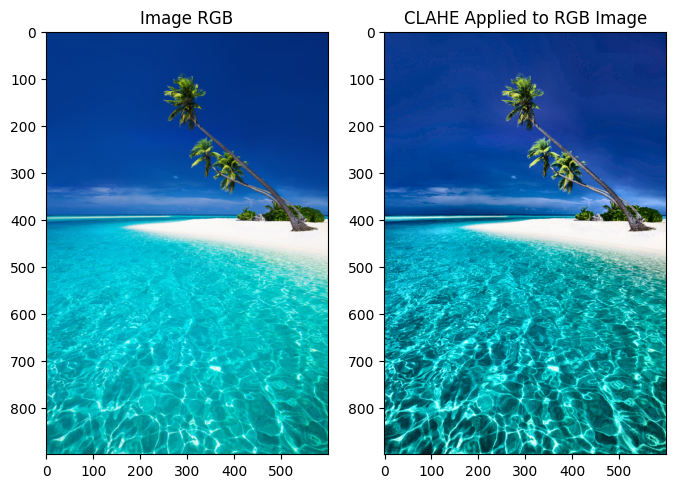

In [ ]:
image = cv2.imread('/content/beach-blue.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")

# Adding noise to the image

1) Scrape and collect the images and download the datasets (real time images- CCTV has noisey images at night )

2) Data Cleaning

3) In real time data , we need to add noise to the Training data to match with the real world data images.



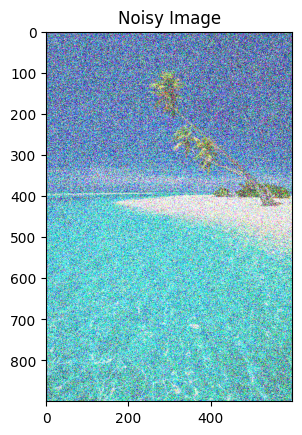

In [ ]:
image = cv2.imread('/content/beach-blue.jpg')

noise = np.random.normal(80, 150, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.show()

# Resizing the image

Resizing an image refers to changing its dimensions, either increasing (upscaling) or decreasing (downscaling) its width and height, while maintaining or altering the aspect ratio. This operation is commonly used in image processing for various purposes, including preparation for machine learning models, fitting images into a specific layout, or optimizing storage and bandwidth.

(900, 600, 3)
(150, 100, 3)


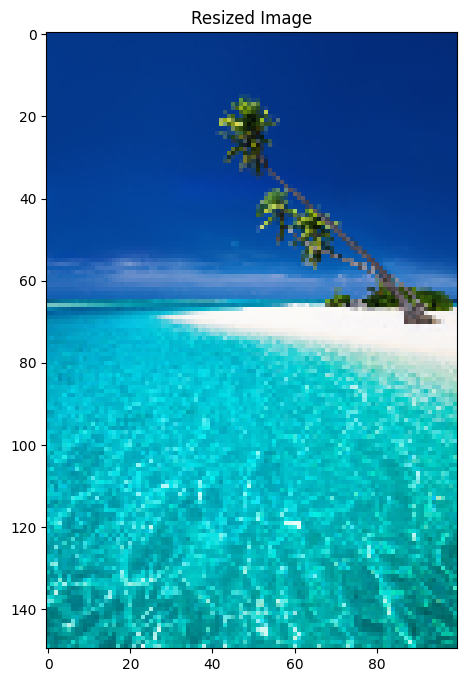

In [ ]:
height, width, _ = image.shape

print(image.shape)

image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_width = int(width/6)
new_height = int(height/6)
new_points = (new_width, new_height)
# new_points = (400, 400)
rescaled_img = cv2.resize(image_, new_points, interpolation= cv2.INTER_LINEAR)

print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(12, 8))

plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

# Crop an Image

Cropping an image involves extracting a rectangular portion of the image by removing unwanted outer areas. This operation is used to focus on a specific region of interest (ROI), remove distractions, or prepare the image for further processing.

#How Cropping Works

The image is represented as a 2D (grayscale) or 3D (color) array of pixel values.

To crop, you specify a bounding rectangle by its starting point (x, y) and the width and height of the desired region.


(400, 400, 3)


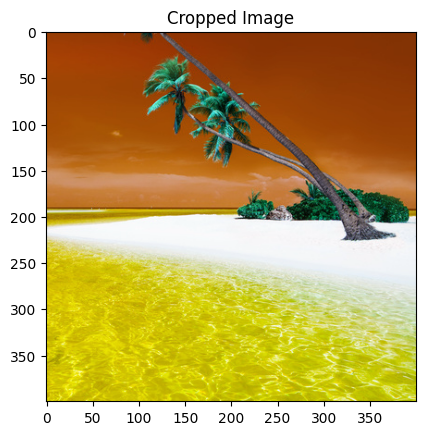

In [ ]:
# Cropping an image
cropped_image = image[200:600, 200:600]

print(cropped_image.shape)

plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

# Image Rotation

Image rotation is the process of turning an image around a specific pivot point, usually its center, by a given angle. This operation is widely used in image processing for tasks like alignment, perspective adjustments, and aesthetic transformations.



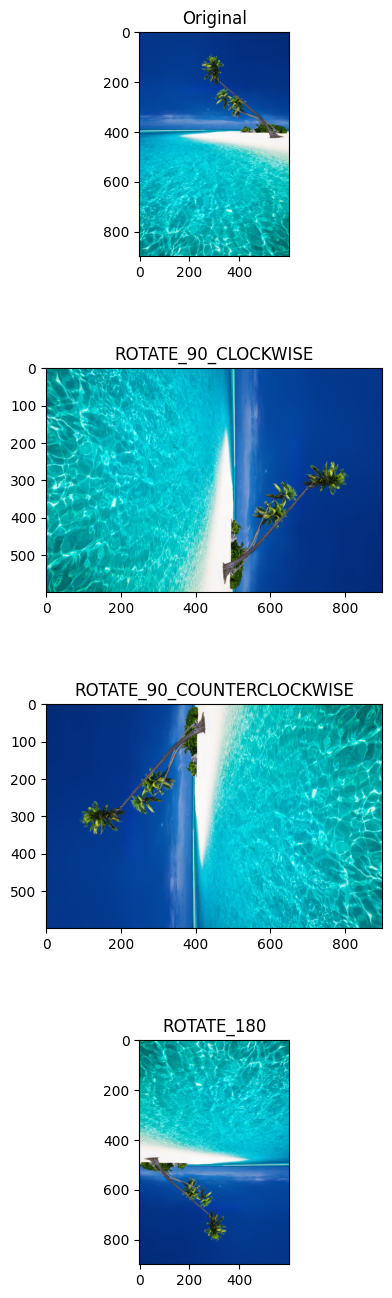

In [ ]:
# Rotate the image

image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_90c = cv2.rotate(image_r, cv2.ROTATE_90_CLOCKWISE)
rotated_90ac = cv2.rotate(image_r, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_180 = cv2.rotate(image_r, cv2.ROTATE_180)

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.imshow(image_r)
plt.title('Original')

plt.subplot(4, 1, 2)
plt.imshow(rotated_90c)
plt.title('ROTATE_90_CLOCKWISE')

plt.subplot(4, 1, 3)
plt.imshow(rotated_90ac)
plt.title("ROTATE_90_COUNTERCLOCKWISE")

plt.subplot(4, 1, 4)
plt.imshow(rotated_180)
plt.title("ROTATE_180")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# Image Rotation to 20 degree angle

wrapAffine Transformation -  An affine transformation is a linear mapping method that preserves points, straight lines, and planes. It allows operations like translation, rotation, scaling, shearing, and reflection.

Common Affine TRansformation

- Translation : Moves every point of an image or shape by the same amount in a specified direction.

- Scaling : Resizes an image or shape by a scaling factor.

- Rotation : Rotates an image or shape around a specified point (often the center).

- Shearing : Slants the shape of an object along the x or y axis.


Height and width of original image 900 600


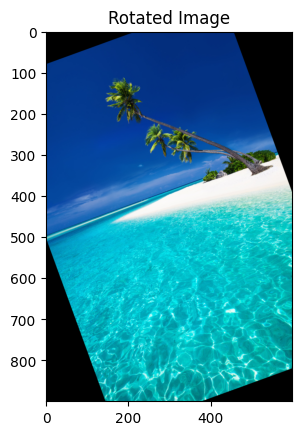

In [ ]:
image = cv2.imread('/content/beach-blue.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image_rgb.shape[:2]
print("Height and width of original image", height, width)

# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image_rgb, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()


# Flipping the image

Flipping an image is the process of mirroring it across a specified axis, either horizontally, vertically, or both. This operation creates a reversed version of the image along the selected axis.

Syntax : image = cv2.flip(img, flipCode)

- flipCode = 0: Flips the image vertically (around the x-axis).
- flipCode = 1: Flips the image horizontally (around the y-axis).
- flipCode = -1: Flips the image both vertically and horizontally (180-degree rotation).

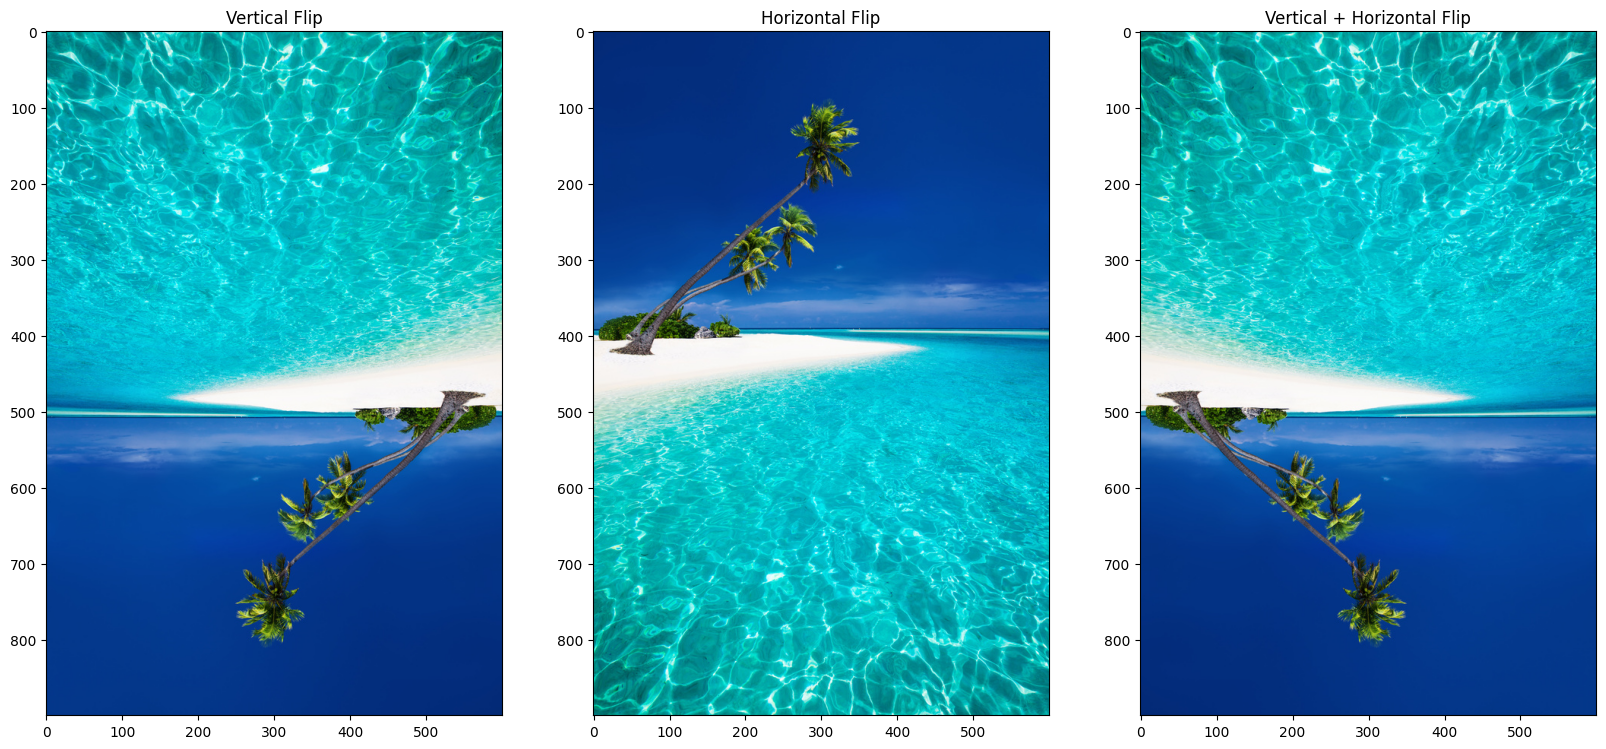

In [ ]:
image_f = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flip
flipped_v = cv2.flip(image_f, 0)  # Vertical flip

flipped_h = cv2.flip(image_f, 1)  # Horizontal flip

flipped_vh = cv2.flip(image_f, -1)  # Horizontal flip

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(1, 3, 1)
plt.imshow(flipped_v)
plt.title("Vertical Flip")

plt.subplot(1, 3, 2)
plt.imshow(flipped_h)
plt.title("Horizontal Flip")

plt.subplot(1, 3, 3)
plt.imshow(flipped_vh)
plt.title("Vertical + Horizontal Flip")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)